In [70]:

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd 
import numpy as np 
import matplotlib

import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [72]:
df = pd.read_csv('../datasets/sales_data.csv')

In [73]:
df

,OrderNumber,OrderDate,WarehouseCode,Sales Channel,StoreID,SalesTeamID,CustomerID,ProductID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost
0,SO - 000101,5/31/2018,WARE-UHY1004,1,259,6,15,12,5,0.075,1963.1,1001.18
1,SO - 000102,5/31/2018,WARE-NMK1003,2,196,14,20,27,3,0.075,3939.6,3348.66
2,SO - 000103,5/31/2018,WARE-UHY1004,3,213,21,16,16,1,0.050,1775.5,781.22
3,SO - 000104,5/31/2018,WARE-NMK1003,4,107,28,48,23,8,0.075,2324.9,1464.69
4,SO - 000105,5/31/2018,WARE-NMK1003,3,111,22,49,26,8,0.100,1822.4,1476.14
...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,12/30/2020,WARE-MKL1006,1,339,9,41,29,1,0.075,234.5,121.94
7987,SO - 0008088,12/30/2020,WARE-NMK1003,2,202,14,29,3,6,0.050,3202.6,1921.56
7988,SO - 0008089,12/30/2020,WARE-UHY1004,2,241,14,32,35,5,0.200,3825.7,2792.76
7989,SO - 0008090,12/30/2020,WARE-NMK1003,2,112,20,42,36,8,0.100,1072.0,804.00


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   OrderDate         7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   Sales Channel     7991 non-null   int64  
 4   StoreID           7991 non-null   int64  
 5   SalesTeamID       7991 non-null   int64  
 6   CustomerID        7991 non-null   int64  
 7   ProductID         7991 non-null   int64  
 8   Order_Quantity    7991 non-null   int64  
 9   Discount_Applied  7991 non-null   float64
 10  Unit_Price        7991 non-null   float64
 11  Unit_Cost         7991 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 749.3+ KB


In [75]:
df.columns

Index(['OrderNumber', 'OrderDate', 'WarehouseCode', 'Sales Channel', 'StoreID',
       'SalesTeamID', 'CustomerID', 'ProductID', 'Order_Quantity',
       'Discount_Applied', 'Unit_Price', 'Unit_Cost'],
      dtype='object')

In [76]:
train_cols = ['Sales Channel', 'StoreID',
       'SalesTeamID', 'CustomerID', 'ProductID',
       'Discount_Applied', 'Unit_Price', 'Unit_Cost']

train_cols_few = ['StoreID',
       'SalesTeamID', 'CustomerID', 'ProductID',
'Unit_Price', 'Unit_Cost']

x = df[train_cols_few]
y = df['Order_Quantity']

In [77]:
x

,StoreID,SalesTeamID,CustomerID,ProductID,Unit_Price,Unit_Cost
0,259,6,15,12,1963.1,1001.18
1,196,14,20,27,3939.6,3348.66
2,213,21,16,16,1775.5,781.22
3,107,28,48,23,2324.9,1464.69
4,111,22,49,26,1822.4,1476.14
...,...,...,...,...,...,...
7986,339,9,41,29,234.5,121.94
7987,202,14,29,3,3202.6,1921.56
7988,241,14,32,35,3825.7,2792.76
7989,112,20,42,36,1072.0,804.00


In [78]:
y

0       5
1       3
2       1
3       8
4       8
       ..
7986    1
7987    6
7988    5
7989    8
7990    5
Name: Order_Quantity, Length: 7991, dtype: int64

RANDOMM FOREST TRAINING

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)


In [80]:
x_train

,StoreID,SalesTeamID,CustomerID,ProductID,Unit_Price,Unit_Cost
562,15,17,32,20,971.5,592.62
1315,213,13,1,45,5205.9,4372.96
5883,77,24,5,12,2505.8,1303.02
2575,307,15,17,27,1922.9,1134.51
3294,59,15,31,27,1748.7,1294.04
...,...,...,...,...,...,...
406,76,22,50,21,5976.4,3466.31
5510,85,10,28,28,931.3,447.02
2191,292,23,25,20,3979.8,2785.86
7409,18,20,33,36,3035.1,1335.44


In [81]:
forest_model  = RandomForestRegressor(n_jobs=-1, random_state=42)

In [82]:
%%time 
forest_model.fit(x_train, y_train)

Wall time: 9.99 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [83]:
forest_model.score(x_train, y_train)

0.8533763537796142

forest_train_probability = forest_model.predict_proba(x_train)
forest_train_probability

In [84]:
forest_model.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1608637542)

In [85]:
len(forest_model.estimators_)

100

In [86]:
forest_importance_df = pd.DataFrame({
    'feature' : x_train.columns, 
    'importance' : forest_model.feature_importances_
}).sort_values('importance', ascending=False)

In [87]:
forest_importance_df.head(10)

,feature,importance
5,Unit_Cost,0.203135
0,StoreID,0.197802
4,Unit_Price,0.168613
2,CustomerID,0.148411
3,ProductID,0.148222
1,SalesTeamID,0.133817


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

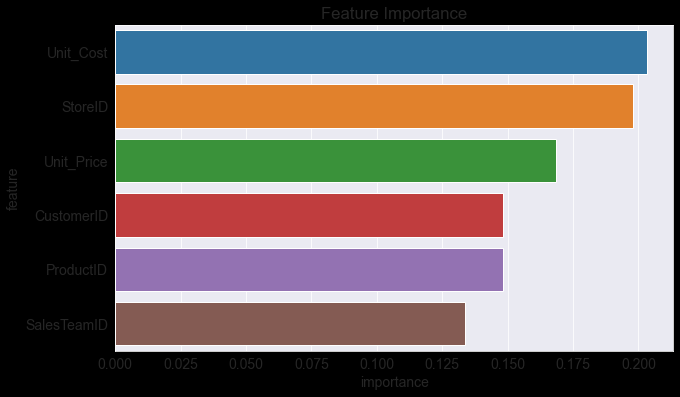

In [88]:
plt.title('Feature Importance')
sns.barplot(data=forest_importance_df.head(10), x='importance', y='feature')

In [89]:
base_forest_model = RandomForestRegressor(random_state=42, n_jobs=-1).fit(x_train, y_train)

In [90]:
base_train_accuracy = base_forest_model.score(x_train, y_train)

In [91]:
base_accuracy = base_train_accuracy
base_accuracy

0.8533763537796142

In [92]:
forest_model_1 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=10).fit(x_train, y_train)

In [93]:
forest_model_1.score(x_train, y_train)

0.7976486937206595

In [94]:
forest_model_2 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=500).fit(x_train, y_train)


In [95]:
forest_model_2.score(x_train, y_train)

0.8584449880888628

In [96]:
def estimator_no_error(est):
    forest_model_3 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=est)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'No. of Estimators' : est, 
        'Training Error' : forest_train_accuracy
        }

In [97]:
%%time
forest_error_df = pd.DataFrame([estimator_no_error(est) for est in range(1, 10)])

Wall time: 1.84 s


In [98]:
forest_error_df

,No. of Estimators,Training Error
0,1,0.736935
1,2,0.448007
2,3,0.348538
3,4,0.296514
4,5,0.266864
5,6,0.245811
6,7,0.231981
7,8,0.220493
8,9,0.210788


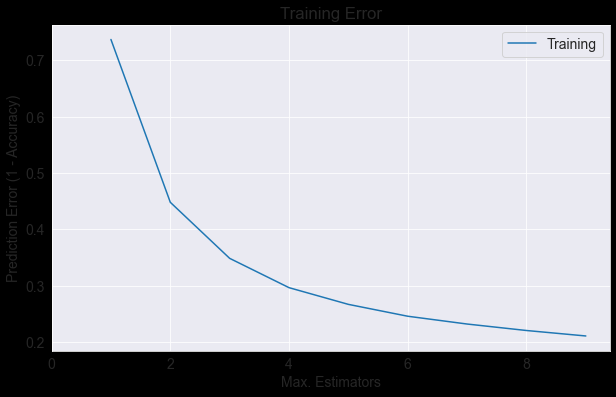

In [99]:
plt.figure()
plt.plot(forest_error_df['No. of Estimators'], forest_error_df['Training Error'])

plt.title('Training Error')

plt.xticks(range(0,10,2))

plt.xlabel('Max. Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')

plt.legend(['Training'])

In [100]:
def test_params(**params):
    rf_model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return rf_model.score(x_train, y_train)

In [101]:
test_params(max_depth=5)

0.04039666787056351

In [102]:
test_params(max_depth=26)

0.8254654367838202

In [103]:
def depth_max(dm):
    forest_model_3 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=dm)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max depth' : dm, 
        'Training Error' : forest_train_accuracy
        }

In [104]:
%%time
max_depth_df = pd.DataFrame([depth_max(dm) for dm in range(1, 10)])

Wall time: 10.3 s


In [105]:
max_depth_df

,Max depth,Training Error
0,1,0.997618
1,2,0.993537
2,3,0.986233
3,4,0.975823
4,5,0.959603
5,6,0.936469
6,7,0.907377
7,8,0.870578
8,9,0.826738


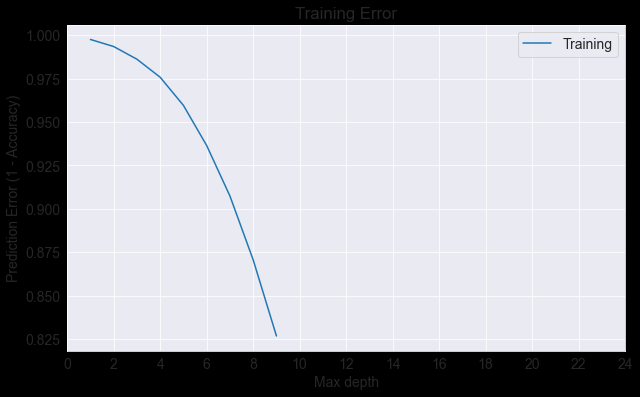

In [106]:
plt.figure()
plt.plot(max_depth_df['Max depth'], max_depth_df['Training Error'])

plt.title('Training Error')
plt.xticks(range(0,26,2))
plt.xlabel('Max depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training'])

In [107]:
test_params(max_leaf_nodes= 2**5)

0.06684068735518445

In [108]:
test_params(max_leaf_nodes= 2**20)

0.8532927190280968

In [109]:
base_accuracy

0.8533763537796142

In [110]:
def max_leaf(ml):
    forest_model_3 = RandomForestRegressor(random_state=42, n_jobs=-1, max_leaf_nodes=ml)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max leaf_nodes' : ml, 
        'Training Error' : forest_train_accuracy
        }

In [111]:
%%time
max_leaf_df = pd.DataFrame([max_leaf(ml) for ml in range(2, 20)])

Wall time: 19.9 s


In [112]:
max_leaf_df

,Max leaf_nodes,Training Error
0,2,0.997618
1,3,0.995248
2,4,0.992758
3,5,0.990318
4,6,0.988011
5,7,0.985660
6,8,0.983545
7,9,0.981417
8,10,0.979216
9,11,0.976795


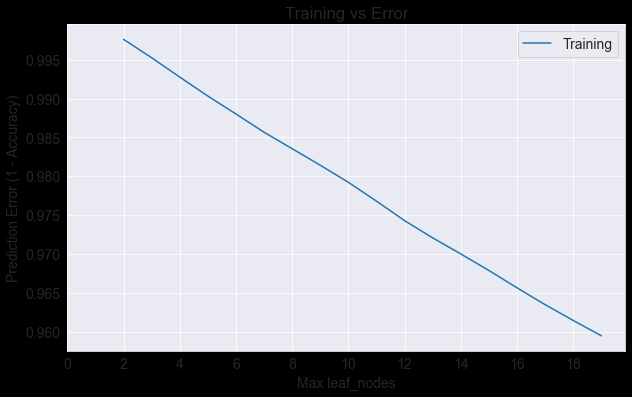

In [113]:
plt.figure()
plt.plot(max_leaf_df['Max leaf_nodes'], max_leaf_df['Training Error'])

plt.title('Training vs Error')
plt.xticks(range(0,20,2))
plt.xlabel('Max leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training'])

In [114]:
test_params(max_features='log2')

0.8534361783658615

In [115]:
test_params(max_features=3)

0.853168597301744

In [116]:
def features_max(mf):
    forest_model_3 = RandomForestRegressor(random_state=42, n_jobs=-1, max_features=mf)
    forest_model_3.fit(x_train, y_train)

    forest_train_accuracy = 1 - forest_model_3.score(x_train, y_train)

    return {
        'Max features' : mf, 
        'Training Error' : forest_train_accuracy
        }

In [117]:
max_leaf_df = pd.DataFrame([features_max('log2')])

In [118]:
max_leaf_df

,Max features,Training Error
0,log2,0.146564


In [119]:
max_leaf_df = pd.DataFrame([features_max('sqrt')])

In [120]:
max_leaf_df

,Max features,Training Error
0,sqrt,0.146564


In [121]:
max_leaf_df = pd.DataFrame([features_max('auto')])

In [122]:
max_leaf_df

,Max features,Training Error
0,auto,0.146624


In [123]:
max_leaf_df = pd.DataFrame([features_max(None)])

In [124]:
max_leaf_df

,Max features,Training Error
0,None,0.146624


In [125]:
test_params(min_samples_split=3, min_samples_leaf=2)

0.780759309022343

In [126]:
test_params(min_samples_split=20, min_samples_leaf=14)

0.253467165801907

In [127]:
test_params(min_impurity_decrease=1e-7)

0.8533763537796142

In [128]:
test_params(min_impurity_decrease=1e-5)

0.8533763537796142

In [129]:
test_params(bootstrap=False)

1.0

In [130]:
test_params(bootstrap=True, max_samples=0.9)

0.8224468788966726

In [131]:
final_rf = RandomForestRegressor(
    random_state=42,
    n_estimators=10,
    max_features='auto',
    max_depth=5,
    max_leaf_nodes=12,
    min_samples_split=20, 
    min_samples_leaf=14
)

In [132]:
final_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=12, min_samples_leaf=14,
                      min_samples_split=20, n_estimators=10, random_state=42)

In [133]:
final_rf.score(x_train, y_train)

0.021653417265406927

In [134]:
y_pred = final_rf.predict(x_test)

In [135]:
rmse = np.sqrt(mse(y_test, y_pred))

In [136]:
rmse

2.3172036968521468